# Interactive single compartment HH example

In [1]:
!pip install pyneuroml
!pip install libneuroml
import math
from neuroml import NeuroMLDocument
from neuroml import Cell
from neuroml import IonChannelHH
from neuroml import GateHHRates
from neuroml import BiophysicalProperties
from neuroml import MembraneProperties
from neuroml import ChannelDensity
from neuroml import HHRate
from neuroml import SpikeThresh
from neuroml import SpecificCapacitance
from neuroml import InitMembPotential
from neuroml import IntracellularProperties
from neuroml import IncludeType
from neuroml import Resistivity
from neuroml import Morphology, Segment, Point3DWithDiam
from neuroml import Network, Population
from neuroml import PulseGenerator, ExplicitInput
import numpy as np
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Plot the data we record

## Create and run the simulation

Create the simulation, run it, record data, and plot the recorded information.

In [10]:
from xml.dom import minidom

# Simulation bits
sim_id = "hn1"
simulation = LEMSSimulation(sim_id=sim_id, duration=20000, dt=0.01, simulation_seed=123)
# Include the NeuroML model file
simulation.include_neuroml2_file("../../network.iso.cell1.nml")
#simulation.include_neuroml2_file("cell.1.nml")
#simulation.include_neuroml2_file("k1.channel.nml")
#simulation.include_neuroml2_file("k2.channel.nml")
#simulation.include_neuroml2_file("na.channel.nml")
#simulation.include_neuroml2_file("passive.channel.nml")
#simulation.include_neuroml2_file("sigmoid.offset.xml")

# Assign target for the simulation
simulation.assign_simulation_target("net_1")

# Recording information from the simulation
simulation.create_output_file(id="output0", file_name=sim_id + ".dat")#timeScale="1ms", xmin="0", xmax="20000", ymin="-70", ymax="0")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn1L_pop[0]/v") #scale="1mV", timeScale="1ms")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

#mydoc = minidom.parse('run_1cells_Vm_cell1.xml')

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

/usr/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pyNeuroML >>> Written LEMS Simulation hn1 to file: LEMS_hn1.xml


True

/usr/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pyNeuroML >>> Generating plot: Membrane potential


/usr/lib/python3.9/site-packages/pyneuroml/pynml.py:1693: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(title)
/usr/lib/python3.9/site-packages/pyneuroml/pynml.py:1732: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xvalues[i], yvalues[i], 'o', marker=marker, markersize=markersize, linestyle=linestyle, linewidth=linewidth, label=label)


pyNeuroML >>> Saved image to hn1-v.png of plot: Membrane potential


<AxesSubplot:xlabel='time (s)', ylabel='membrane potential (V)'>

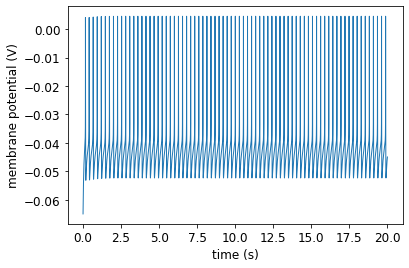

In [11]:
# Plot the data
data_array = np.loadtxt(sim_id + ".dat")
pynml.generate_plot([data_array[:, 0]], [data_array[:, 1]], "Membrane potential", show_plot_already=False, save_figure_to=sim_id + "-v.png", xaxis="time (s)", yaxis="membrane potential (V)")
#pynml.generate_plot([data_array[:, 0]], [data_array[:, 2]], "channel current", show_plot_already=False, save_figure_to=sim_id + "-i.png", xaxis="time (s)", yaxis="channel current (A)")
#pynml.generate_plot([data_array[:, 0], data_array[:, 0]], [data_array[:, 3], data_array[:, 4]], "current density", labels=["Na", "K1", "K2"], show_plot_already=False, save_figure_to=sim_id + "-iden.png", xaxis="time (s)", yaxis="current density (A_per_m2)")